In [22]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [23]:
# 1. Các thư viện cần thiết
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_percentage_error

In [24]:
file_path = "/content/drive/MyDrive/crt/FPTGRU.csv"
df = pd.read_csv(file_path)
df


,Date,Price
0,15/12/2023,96200.0
1,14/12/2023,96200.0
2,13/12/2023,95200.0
3,12/12/2023,96800.0
4,11/12/2023,95000.0
...,...,...
1745,21/12/2016,15311.6
1746,20/12/2016,15329.6
1747,19/12/2016,15383.6
1748,16/12/2016,15167.5


Ratio 7-3

In [25]:
# 2. Đọc file dữ liệu chứng khoán AAPL và chia train test theo tỉ lệ 8:2
df = df[['Price']]
df=df.dropna()
df = df.reset_index(drop=True) # Reset the index

# Split the data into training, testing, and validation sets
train_size = int(0.7* len(df))
test_size = int(0.3 * len(df))

train_data = df[:train_size]
test_data = df[train_size:train_size+test_size]


In [26]:
# 3. Quá trình Training
x_train = np.array(train_data.index).reshape(-1, 1)
y_train = np.array(train_data['Price'])

# Train the linear regression model
model = LinearRegression()
model.fit(x_train, y_train)


LinearRegression()

In [27]:
# 4. Quá trình testing
x_test = np.array(test_data.index).reshape(-1, 1)
y_test = np.array(test_data['Price'])
y_pred = model.predict(x_test)

In [28]:
# 6. Quá trình tạo index predict 30 ngày tiếp theo
last_index =  df.index[-1]
last_data = pd.RangeIndex(start=last_index, stop=last_index+30, step=1)

# Create an array of 30 consecutive integers starting from last_index
x_next_30_days = np.array(range(last_index+1, last_index+31)).reshape(-1, 1)

# Predict the closing prices for the next 30 days
y_next_30_days = model.predict(x_next_30_days)

# Print the predicted closing prices for the next 30 days
print('Predicted closing prices for the next 30 days:')
print(y_next_30_days)

Predicted closing prices for the next 30 days:
[-14376.64642607 -14441.45828265 -14506.27013924 -14571.08199582
 -14635.89385241 -14700.70570899 -14765.51756558 -14830.32942216
 -14895.14127874 -14959.95313533 -15024.76499191 -15089.5768485
 -15154.38870508 -15219.20056167 -15284.01241825 -15348.82427484
 -15413.63613142 -15478.44798801 -15543.25984459 -15608.07170118
 -15672.88355776 -15737.69541435 -15802.50727093 -15867.31912752
 -15932.1309841  -15996.94284068 -16061.75469727 -16126.56655385
 -16191.37841044 -16256.19026702]


In [29]:
# 7. Đánh giá độ chính xác test
test_rmse = np.sqrt(np.mean((y_pred - y_test)**2))
print('Testing RMSE:', test_rmse)
mape = mean_absolute_percentage_error(y_test, y_pred) * 100
print("MAPE:", mape)
test_mae = np.mean(np.abs(y_pred - y_test))
print("Testing MAE:",test_mae)


Testing RMSE: 20525.12469431554
MAPE: 92.80680116225753
Testing MAE: 18895.547953808622


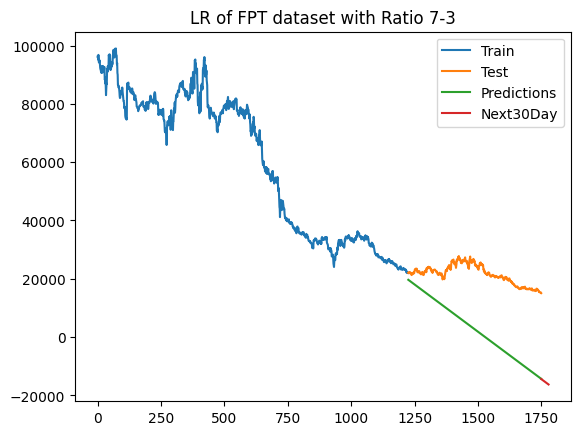

In [30]:

# 9.Vẽ hình
plt.plot(train_data.index, train_data['Price'])
plt.plot(test_data.index, test_data['Price'])
plt.plot(test_data.index, y_pred)
plt.plot(last_data,y_next_30_days)
plt.legend(['Train', 'Test', 'Predictions','Next30Day'])
plt.title('LR of FPT dataset with Ratio 7-3')
plt.show()

Ratio 8-2

In [31]:
# 2. Đọc file dữ liệu chứng khoán AAPL và chia train test theo tỉ lệ 8:2
df = df[['Price']]
df=df.dropna()
df = df.reset_index(drop=True) # Reset the index

# Split the data into training, testing, and validation sets
train_size = int(0.8* len(df))
test_size = int(0.2* len(df))

train_data = df[:train_size]
test_data = df[train_size:train_size+test_size]

In [32]:
# 3. Quá trình Training
x_train = np.array(train_data.index).reshape(-1, 1)
y_train = np.array(train_data['Price'])

# Train the linear regression model
model = LinearRegression()
model.fit(x_train, y_train)

LinearRegression()

In [33]:
# 4. Quá trình testing
x_test = np.array(test_data.index).reshape(-1, 1)
y_test = np.array(test_data['Price'])
y_pred = model.predict(x_test)

In [34]:
# 6. Quá trình tạo index predict 30 ngày tiếp theo
last_index =  df.index[-1]
last_data = pd.RangeIndex(start=last_index, stop=last_index+30, step=1)

# Create an array of 30 consecutive integers starting from last_index
x_next_30_days = np.array(range(last_index+1, last_index+31)).reshape(-1, 1)

# Predict the closing prices for the next 30 days
y_next_30_days = model.predict(x_next_30_days)

# Print the predicted closing prices for the next 30 days
print('Predicted closing prices for the next 30 days:')
print(y_next_30_days)

Predicted closing prices for the next 30 days:
[ -8958.82773648  -9019.49847391  -9080.16921133  -9140.83994876
  -9201.51068618  -9262.18142361  -9322.85216103  -9383.52289846
  -9444.19363588  -9504.86437331  -9565.53511073  -9626.20584816
  -9686.87658558  -9747.54732301  -9808.21806043  -9868.88879786
  -9929.55953528  -9990.23027271 -10050.90101013 -10111.57174756
 -10172.24248498 -10232.91322241 -10293.58395983 -10354.25469726
 -10414.92543468 -10475.59617211 -10536.26690953 -10596.93764696
 -10657.60838438 -10718.27912181]


In [35]:
# 7. Đánh giá độ chính xác test
test_rmse = np.sqrt(np.mean((y_pred - y_test)**2))
print('Testing RMSE:', test_rmse)
mape = mean_absolute_percentage_error(y_test, y_pred) * 100
print("MAPE:", mape)
test_mae = np.mean(np.abs(y_pred - y_test))
print("Testing MAE:",test_mae)

Testing RMSE: 19555.53525253825
MAPE: 97.05385662032194
Testing MAE: 19381.977604091993


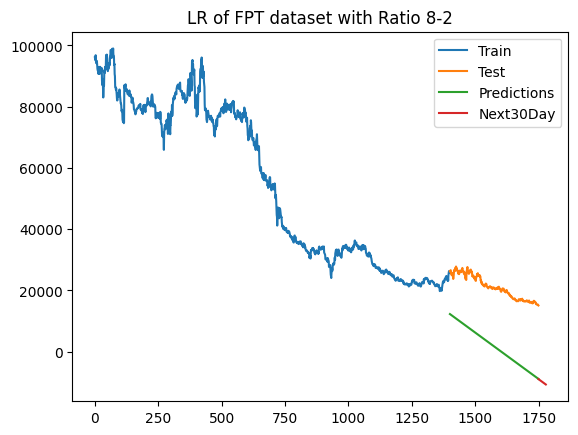

In [36]:
# 9.Vẽ hình
plt.plot(train_data.index, train_data['Price'])
plt.plot(test_data.index, test_data['Price'])
plt.plot(test_data.index, y_pred)
plt.plot(last_data,y_next_30_days)
plt.legend(['Train', 'Test', 'Predictions','Next30Day'])
plt.title('LR of FPT dataset with Ratio 8-2')
plt.show()

Ratio 9-1

In [37]:
# 2. Đọc file dữ liệu chứng khoán AAPL và chia train test theo tỉ lệ 8:2
df = df[['Price']]
df=df.dropna()
df = df.reset_index(drop=True) # Reset the index

# Split the data into training, testing, and validation sets
train_size = int(0.9* len(df))
test_size = int(0.1* len(df))

train_data = df[:train_size]
test_data = df[train_size:train_size+test_size]

In [38]:
# 3. Quá trình Training
x_train = np.array(train_data.index).reshape(-1, 1)
y_train = np.array(train_data['Price'])

# Train the linear regression model
model = LinearRegression()
model.fit(x_train, y_train)

LinearRegression()

In [39]:
# 4. Quá trình testing
x_test = np.array(test_data.index).reshape(-1, 1)
y_test = np.array(test_data['Price'])
y_pred = model.predict(x_test)

In [40]:
# 6. Quá trình tạo index predict 30 ngày tiếp theo
last_index =  df.index[-1]
last_data = pd.RangeIndex(start=last_index, stop=last_index+30, step=1)

# Create an array of 30 consecutive integers starting from last_index
x_next_30_days = np.array(range(last_index+1, last_index+31)).reshape(-1, 1)

# Predict the closing prices for the next 30 days
y_next_30_days = model.predict(x_next_30_days)

# Print the predicted closing prices for the next 30 days
print('Predicted closing prices for the next 30 days:')
print(y_next_30_days)

Predicted closing prices for the next 30 days:
[ -724.33551878  -778.4542371   -832.57295542  -886.69167374
  -940.81039206  -994.92911038 -1049.0478287  -1103.16654701
 -1157.28526533 -1211.40398365 -1265.52270197 -1319.64142029
 -1373.76013861 -1427.87885693 -1481.99757525 -1536.11629357
 -1590.23501188 -1644.3537302  -1698.47244852 -1752.59116684
 -1806.70988516 -1860.82860348 -1914.9473218  -1969.06604012
 -2023.18475843 -2077.30347675 -2131.42219507 -2185.54091339
 -2239.65963171 -2293.77835003]


In [41]:
# 7. Đánh giá độ chính xác test
test_rmse = np.sqrt(np.mean((y_pred - y_test)**2))
print('Testing RMSE:', test_rmse)
mape = mean_absolute_percentage_error(y_test, y_pred) * 100
print("MAPE:", mape)
test_mae = np.mean(np.abs(y_pred - y_test))
print("Testing MAE:",test_mae)

Testing RMSE: 13833.682365816489
MAPE: 78.54683667611415
Testing MAE: 13781.960306728552


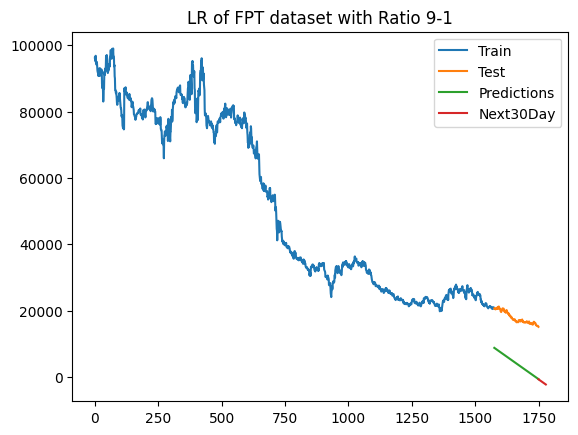

In [42]:
# 9.Vẽ hình
plt.plot(train_data.index, train_data['Price'])
plt.plot(test_data.index, test_data['Price'])
plt.plot(test_data.index, y_pred)
plt.plot(last_data,y_next_30_days)
plt.legend(['Train', 'Test', 'Predictions','Next30Day'])
plt.title('LR of FPT dataset with Ratio 9-1')
plt.show()